# Descripción del data set

Este data set incluye 10 variables que describen los diamantes, como el precio y otros atributos físicos.

**Atributos físicos:**
* Price: precio en dólares.
* Carat: es una medida que especifica el peso de un diamante.
* Cut: indica la calidad del corte del diamante. Las categorías de peor a mejor son: Fair, Good, Very Good, Premium, Ideal.
* Color: de J (peor) a D (mejor). Los colores van del incoloro al amarillo claro o marrón claro.
* Clarity: Indica cuanlimpio es la gema. Las categorias de peor a mejor son:I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF.

**Dimensiones:**
* x largo en mm.
* y ancho en mm.
* z profundidad en mm.

Depth / Profundidad (%) = z / media(x, y)

Table width / Ancho de la cara plana relativo a la parte mas ancha (%).

Estas dos últimas variables afectan la forma en que refleja la luz en el diamante.

![texto del enlace](https://drive.google.com/uc?id=1irNvAUer3dXiJLBAdTN2JyObTCv8rp1n)



**Objetivo**: Estimar el precio de las gemas de acuerdo a las caracteristicas físicas.

**Hipótesis:**
* El precio se encuentra determinado pricipalmente por el tamaño 'carat' de la gema y menos por la claridad de la misma. es decir por las dimensionas más que por un atributo de calidad.
* De las variables de calidad física, influye más en el precio la calidd del corte que el color de la gema.

In [1]:
# manejo de datos
import pandas as pd
import numpy as np

# visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [35]:
# leer los datos
df = pd.read_csv("diamonds.csv", delimiter=";",index_col=[0])

# primeras 5 filas
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# Estructura del ds
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


(53940, 10)

###Este data set esta compuesto por 3 variables cualitativas y 7 cuantitativas.


---


**Cualitativas:**
 * Corte (cut) - Ordinal
 * Color - Ordinal
 * Claridad (clarity) - Ordinal

**Cuantitativas**
 * Carat - Contínua
 * % Profundidad - Contínua
 * Ancho de la cara plana - Contínua
 * x (largo) - Contínua
 * y (ancho) - Contínua
 * z (profundidad) - Contínua

 * Precio - Discreta

In [36]:
#Modificamos las variables 'object' a 'category'            ######  DUDA: esto coresponde para estas que son ordinales e importa el orden? nose ocmo ordenarlas despues en los gráficos
df['cut'] = df['cut'].astype('category')
df['clarity'] = df['clarity'].astype('category')
df['color'] = df['color'].astype('category')
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [10]:
# contar el numero de valores que son na por columnas
print(df.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [11]:
# contar el numero de valores que son 0 por columnas
nun_missing = (df[['carat', 'cut','color', 'clarity','depth', 'table','price', 'x','y','z']] == 0).sum()
print(nun_missing)
#en x, y z hay 0

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64


Observamos que hay algunos valores 0 en las columnas de las dimensiones. En este caso, dada que la cantidad de datos en alta, estas filas con 0 no representan un gran porcentaje, las eliminaré.

In [37]:
#eliminar filas con 0

df=df.drop(df.index[df["x"]==0], axis=0)
df=df.drop(df.index[df["z"]==0], axis=0)
df=df.drop(df.index[df["y"]==0], axis=0)
df.shape

(53920, 10)

In [24]:
# EDA
df.describe()

#df.hist(figsize=[10,10],bins=25)
#plt.tight_layout()



,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


En cuanto a la distribución de las variables, algunas como depth, table, x, y ,z parecen ser bastante simétricas dada la poca diferencia entre su media y su mediana (50%). Podremos observar esto en más detalle más adelante mediante histogramas.

Por otro lado, otras variables como carat y price parecen ser asimétricas estando sesgadas a la derecha, con una media mayor a la mediana.

Para ver esto también podemos calcular el coeficiente de variación y evaluar cuan homogéneos son los datos y si la media es representativa de ellos.

Se observan valores atípicos en los máximos de z e y, pero al no saber si es uno solo o varios, lo conservo y luego con la exploración gráfica decido.

In [25]:
#Ubicamos en que registro esta el valor.
df.loc[df['z']==31.8]

,carat,cut,color,clarity,depth,table,price,x,y,z
48411,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.8


In [26]:
#Ubicamos en que registro esta el valor.
df.loc[df['y']==31.8]

,carat,cut,color,clarity,depth,table,price,x,y,z
49190,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12


En este caso, analizando los valores parece ser un error de tipeo y colocación de la coma. Corregimos estos registros.

In [27]:
df.loc[48411,'z']=3.18

In [ ]:
df.loc[24068,'y']=5.89

In [9]:
# Calcular el coeficiente de variación para cada columna          ##### esto se puede pedir en una sola linea de codigo? bajo un mismo nombre y pedir imprimir solo eso? en vez de crear una variable para cada uno?
coef_var_carat = (df["carat"].std() / df['carat'].mean() *100).round(1)
coef_var_price = (df["price"].std() / df['price'].mean() *100).round(1)
coef_var_depth = (df["depth"].std() / df['depth'].mean() *100).round(1)
coef_var_table = (df["table"].std() / df['table'].mean() *100).round(1)
coef_var_x = (df["x"].std() / df['x'].mean() *100).round(1)
coef_var_y = (df["y"].std() / df['y'].mean() *100).round(1)
coef_var_z = (df["z"].std() / df['z'].mean() *100).round(1)

coef_var_carat, coef_var_price, coef_var_depth, coef_var_table, coef_var_x, coef_var_y, coef_var_z



(59.4, 101.4, 2.3, 3.9, 19.5, 19.9, 19.8)

Siguiendo los criterios vistos en clase (Martinez 2007), efectivamente las variables carat y price no son homogéneos y la media no seria representativa. mientras que para el resto de las variables, los valores son todos menores al 30%, siendo estos datos homogéneos.

En estos casos sería conveniente en caso de necesitar algun valor de referencia, utilizar la mediana en vez de la media.

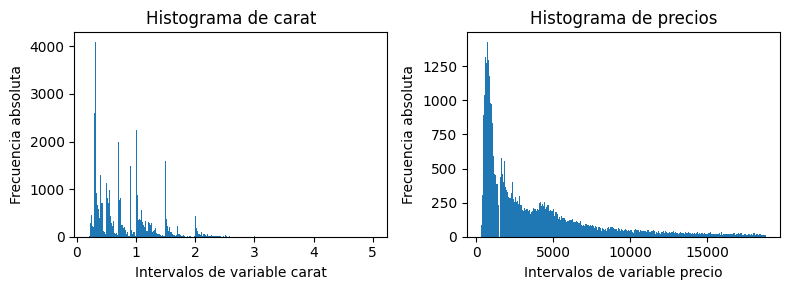

In [6]:
#Graficamos histogramas para ver la distribución de estas variables.
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(8,3))
ax1.hist(df.carat.values.flatten(),bins=400)
ax1.set_title('Histograma de carat')
ax1.set_xlabel('Intervalos de variable carat')
ax1.set_ylabel('Frecuencia absoluta')

ax2.hist(df.price.values.flatten(),bins=400)
ax2.set_title('Histograma de precios')
ax2.set_xlabel('Intervalos de variable precio')
ax2.set_ylabel('Frecuencia absoluta')

plt.tight_layout()

En estos histogramas puede verse la asimetría de estas variables.

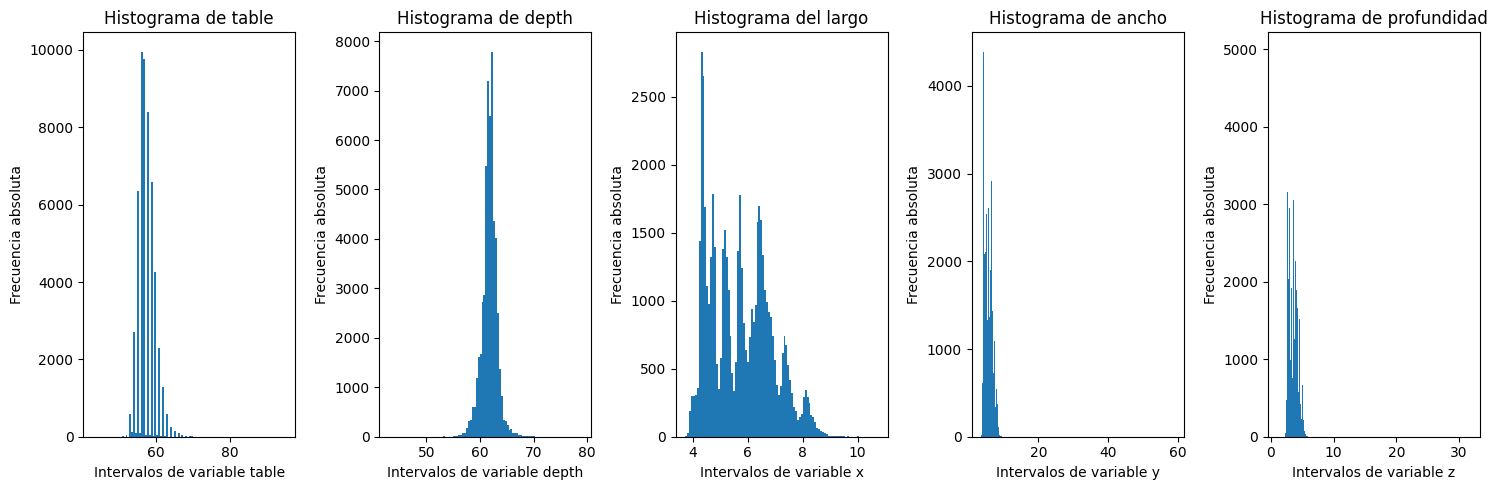

In [5]:
#Graficamos histogramas para ver la distribución de estas variables.        #####DUDA: intente grafica en 2 filas y 3 columnas para que no queden en una misma linea pero no pude solucionar el error "ValueError: not enough values to unpack (expected 5, got 3)"
fig, (ax1, ax2, ax3, ax4, ax5)=plt.subplots(nrows=1,ncols=5, figsize=[15,5])
ax1.hist(df.table.values.flatten(),bins=100)
ax1.set_title('Histograma de table')
ax1.set_xlabel('Intervalos de variable table')
ax1.set_ylabel('Frecuencia absoluta')

ax2.hist(df.depth.values.flatten(),bins=100)
ax2.set_title('Histograma de depth')
ax2.set_xlabel('Intervalos de variable depth')
ax2.set_ylabel('Frecuencia absoluta')

ax3.hist(df.x.values.flatten(),bins=100)
ax3.set_title('Histograma del largo')
ax3.set_xlabel('Intervalos de variable x')
ax3.set_ylabel('Frecuencia absoluta')

ax4.hist(df.y.values.flatten(),bins=400)
ax4.set_title('Histograma de ancho')
ax4.set_xlabel('Intervalos de variable y')
ax4.set_ylabel('Frecuencia absoluta')

ax5.hist(df.z.values.flatten(),bins=400)
ax5.set_title('Histograma de profundidad')
ax5.set_xlabel('Intervalos de variable z')
ax5.set_ylabel('Frecuencia absoluta')

plt.tight_layout()

La variable depth parece ser la mas simétrica, algo más dificil de identificar en la variable x.
Por su lado 'table' posee algunos valores muy frecuentes que salen del tipico patrón simétrico o normal.
Respecto a z e y, el volumen general de datos posee simetría pero existen valores mas altos (outliers o datos erroneos?) que estiran la distribución a la derecha.

In [ ]:
#Ahora analicemos las variables categóricas: corte, color y claridad.
df.describe(include='category')

,cut,color,clarity
count,53920,53920,53920
unique,5,7,8
top,Ideal,G,SI1
freq,21548,11284,13063


In [11]:
cut_values=df.cut.value_counts()
cut_values

cut
Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: count, dtype: int64

In [12]:
color_values=df.color.value_counts()
color_values

color
G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: count, dtype: int64

In [13]:
clarity_values=df.clarity.value_counts()
clarity_values

clarity
SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: count, dtype: int64

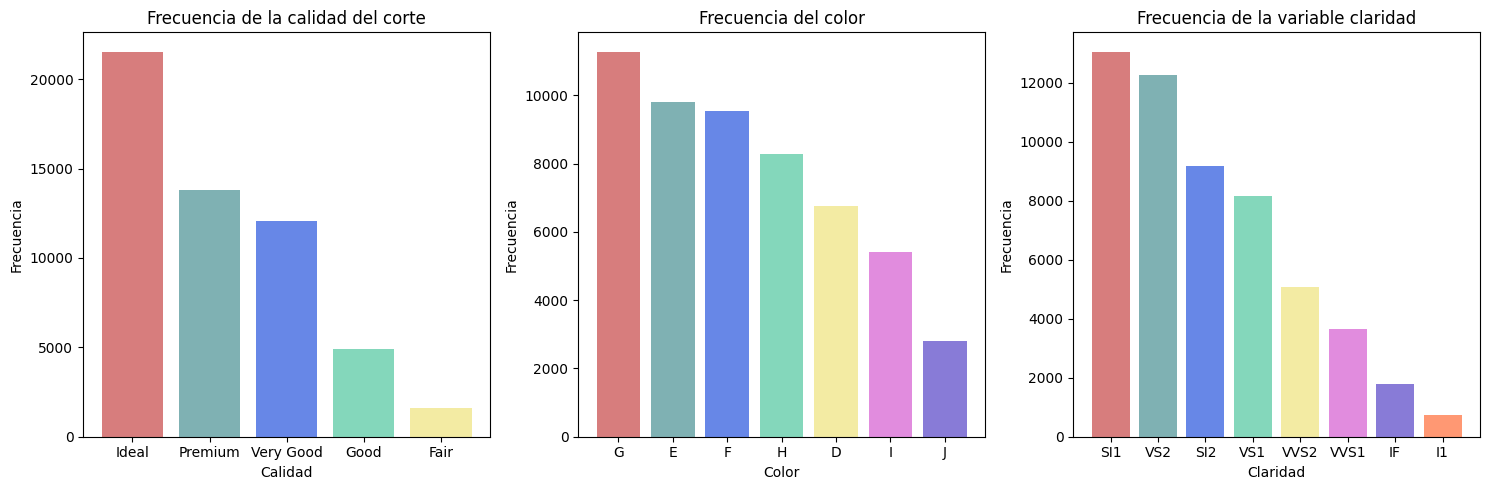

In [14]:
color = ('indianred','cadetblue','royalblue','mediumaquamarine','khaki','orchid','slateblue','coral')

fig,(ax1, ax2, ax3) = plt.subplots(nrows=1,ncols=3,figsize=[15, 5])

ax1.bar(cut_values.index, cut_values, color=color, alpha=0.8)
ax1.set_title('Frecuencia de la calidad del corte')
ax1.set_ylabel('Frecuencia')
ax1.set_xlabel('Calidad')

ax2.bar(color_values.index, color_values, color=color, alpha=0.8)
ax2.set_title('Frecuencia del color')
ax2.set_ylabel('Frecuencia')
ax2.set_xlabel('Color')

ax3.bar(clarity_values.index, clarity_values, color=color, alpha=0.8)
ax3.set_title('Frecuencia de la variable claridad')
ax3.set_ylabel('Frecuencia')
ax3.set_xlabel('Claridad')

plt.tight_layout()

Cut: de peor a mejor son: Fair, Good, Very Good, Premium, Ideal.

Color: de J (peor) a D (mejor).

Clarity: de peor a mejor son:I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF.

**Duda general**: utilizar algún tipo de encoder para variables ordinales, o renombrarlas con algun código para entender el orden de mejor a peor?
No encontré forma de reorganizar las barras.

En el primer gráfico de barras se puede observar que la categoría de corte ideal es la más frecuente, con casi la mitad d elos registros. La siguen en orden decreciente el resto de las categorías en orden de calidad.

Respecto al color las categorías más representadas son G, E y F que corresponden a categorías medias/altas de calidad de color, es decir diamantes casi incoloros.

Hay mayor cantidad de diamantes son de nivel de claridad media a baja (primeras 4 columnas).

Text(0.5, 1.0, 'Matriz de correlación')

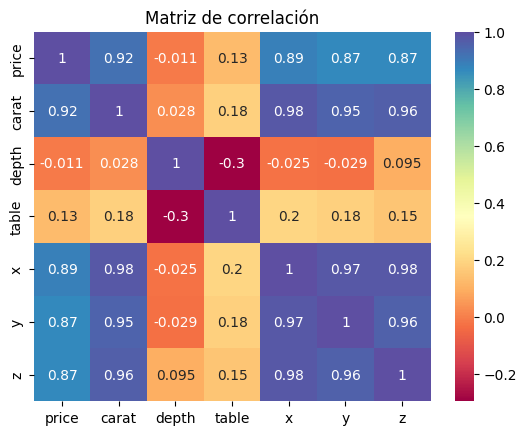

In [20]:
#Como re relacionan estas variables?
columnas_seleccionadas = df[['price', 'carat', 'depth', 'table', 'x', 'y','z']]
matriz_correlacion = columnas_seleccionadas.corr()
ax = plt.axes()
sns.heatmap(matriz_correlacion, cmap='Spectral', annot=True, ax=ax)
ax.set_title('Matriz de correlación')

En esta matriz de correlación podemos observar que las variables %profundidad y table presentan baja correlación con casi todas las variables, siendo ambas calculadas con las medidas de las gemas. Tal vez puede considerarse descartarlas del análisis.

Se encuentran altas correlaciones entres Carat (el peso del diamante, en quilates), el precio (nuestra variable objetivo) y con el ancho, largo y la profundidad de la gemas, lo cual tiene sentido dado que estas últimas medidas determinan el tamaño, lo cual influye en el precio. Si bien el peso en quilates y las variables de tamaño estan relacionadas, no siempre un mismo peso en quilates tendrá el mismo precio pues depende de como este tallado el diamante (variable categorica corte).

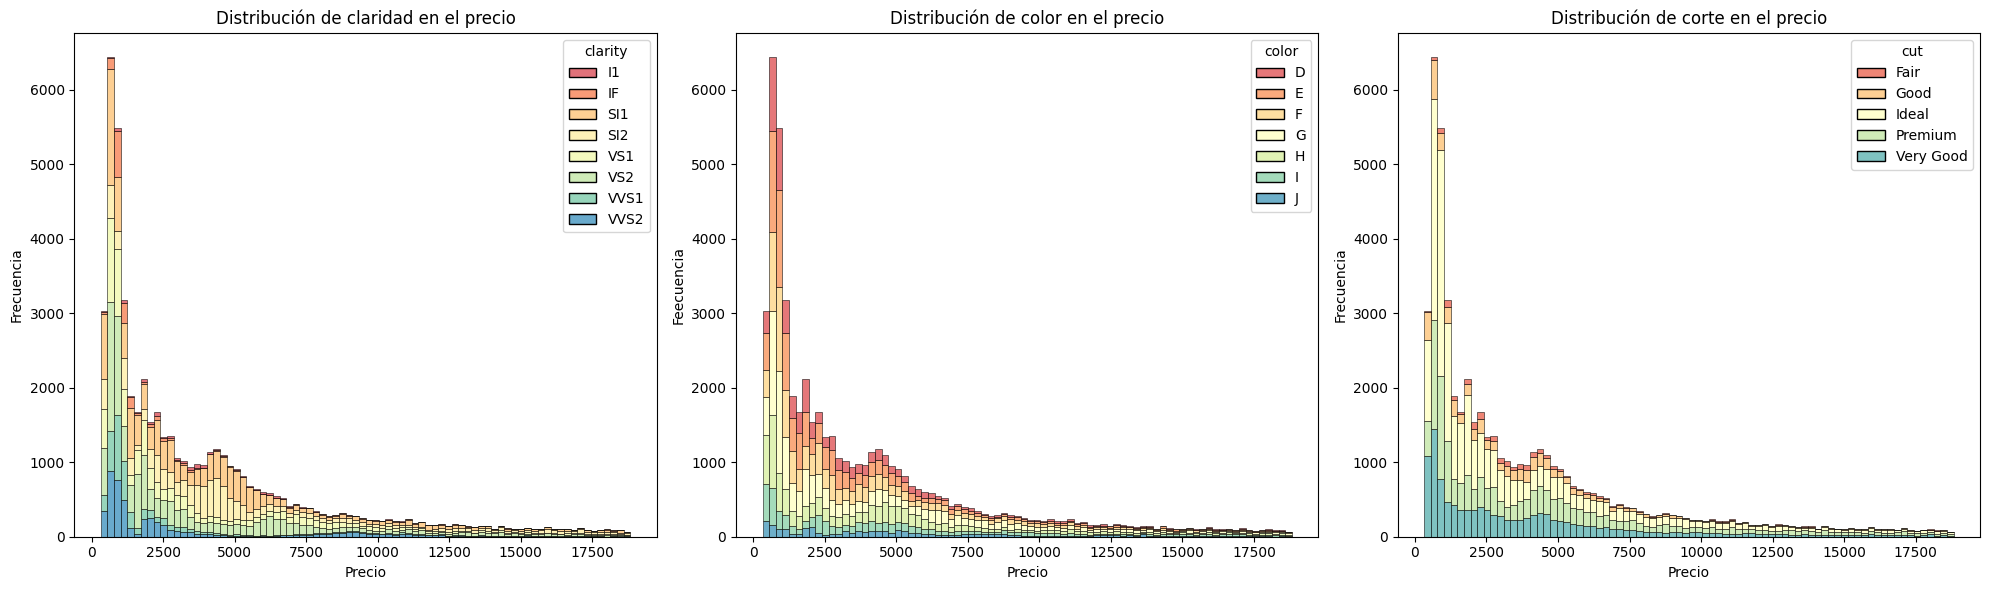

In [42]:
f, axs = plt.subplots(1, 3, figsize=(20, 6), gridspec_kw=dict(width_ratios=[5, 5, 5]))
sns.histplot(data=df, x="price", hue="clarity", multiple="stack",palette='Spectral', ax=axs[0])
sns.histplot(data=df, x="price", hue="color", multiple="stack",palette='Spectral', ax=axs[1])
sns.histplot(data=df, x="price", hue="cut", multiple="stack",palette='Spectral', ax=axs[2])
axs[0].set_title('Distribución de claridad en el precio')
axs[1].set_title('Distribución de color en el precio')
axs[2].set_title('Distribución de corte en el precio')
axs[0].set_xlabel('Precio')
axs[1].set_xlabel('Precio')
axs[2].set_xlabel('Precio')
axs[0].set_ylabel('Frecuencia')
axs[1].set_ylabel('Feecuencia')
axs[2].set_ylabel('Frecuencia')
f.tight_layout()

Podemos observar que hay gran cantidad de diamantes de bajo precio. Con respecto a las caracteristicas de color, claridad y calidad del corte vemos que no parecen presentar relación con el precio, estando distribuidas todas las categorías en todo el rango de precio.

In [11]:
###### me gustaria filtrar los registros de mayor precio para ver más detalle
major_prices=df.loc[df['price'] >=10000,'price']
major_prices

index
21928    10000
21929    10002
21930    10003
21931    10004
21932    10006
         ...  
27746    18803
27747    18804
27748    18806
27749    18818
27750    18823
Name: price, Length: 5215, dtype: int64

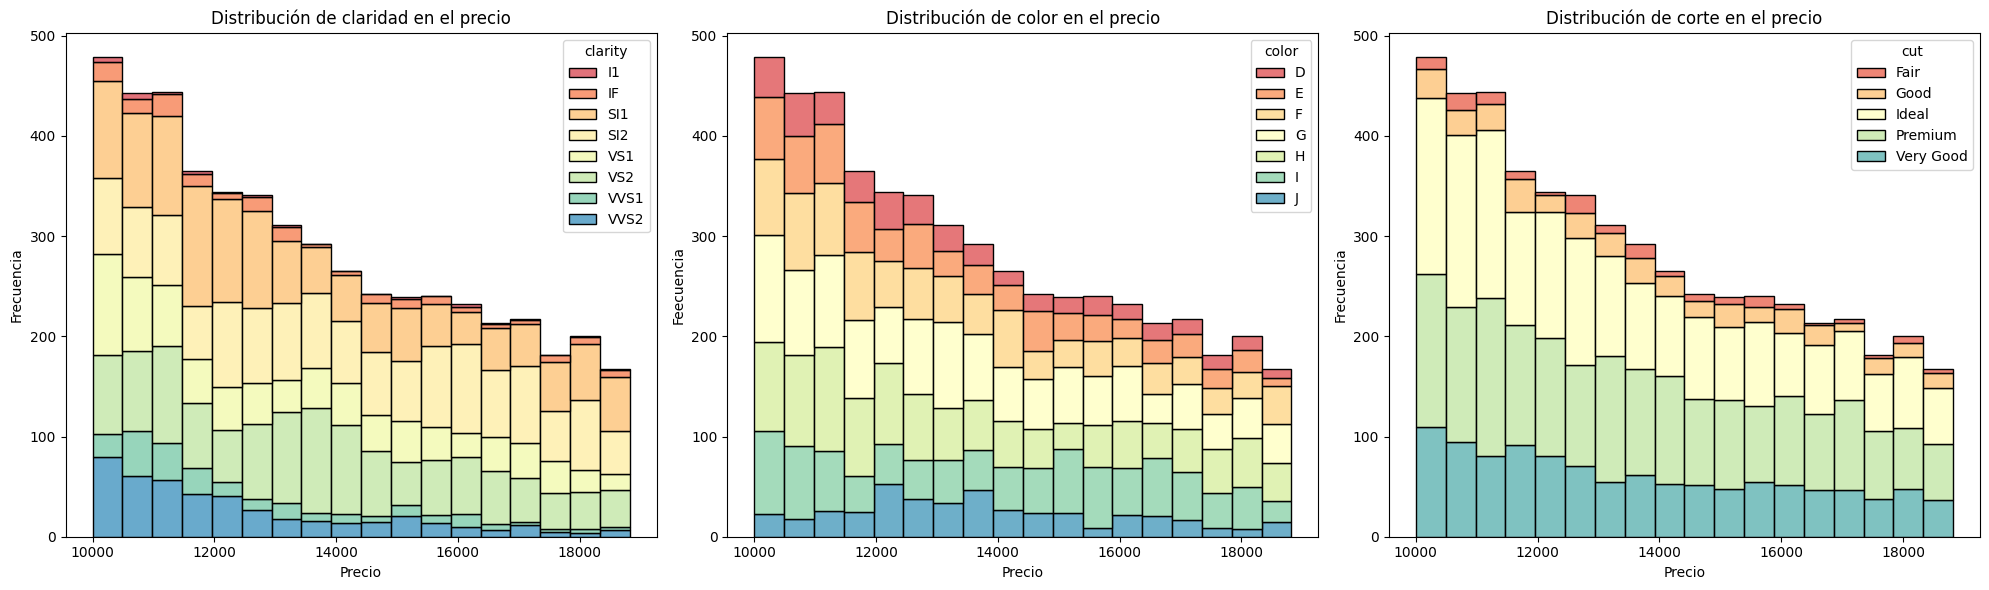

In [12]:
f, axs = plt.subplots(1, 3, figsize=(20, 6), gridspec_kw=dict(width_ratios=[5, 5, 5]))
sns.histplot(data=df, x=major_prices, hue="clarity", multiple="stack",palette='Spectral', ax=axs[0])
sns.histplot(data=df, x=major_prices, hue="color", multiple="stack",palette='Spectral', ax=axs[1])
sns.histplot(data=df, x=major_prices, hue="cut", multiple="stack",palette='Spectral', ax=axs[2])
axs[0].set_title('Distribución de claridad en el precio')
axs[1].set_title('Distribución de color en el precio')
axs[2].set_title('Distribución de corte en el precio')
axs[0].set_xlabel('Precio')
axs[1].set_xlabel('Precio')
axs[2].set_xlabel('Precio')
axs[0].set_ylabel('Frecuencia')
axs[1].set_ylabel('Feecuencia')
axs[2].set_ylabel('Frecuencia')
f.tight_layout()

Ahora viendo más detalle, vemos que el patrón se repite para las gemas de mayor valor.

Text(0, 0.5, 'Carat (quilates)')

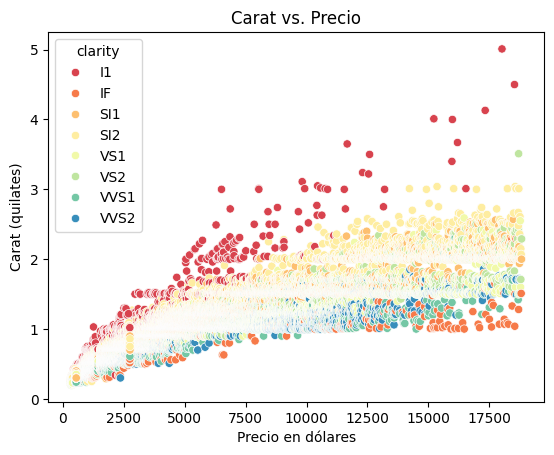

In [17]:
#creo que queda blanco por la cantidad de puntos, no lo pude arreglar
sns.scatterplot(data=df, x="price", y="carat", hue="clarity", palette='Spectral')
plt.title('Carat vs. Precio')
plt.xlabel('Precio en dólares')
plt.ylabel('Carat (quilates)')

En esta gráfica podemos visualizar como interacciona la relación entre el peso en quilates con el precio, seccionado por la claridad de la gema. Vemos una relación lineal entre estas variables especialmente para la peor calidad (I1), mientras que para el resto de las calidades, en orden progresivo hasta la mejor (IF), el precio aumenta más que su peso equivalente en quilates. Entonces obtenemos que para los pesos bajos, un mismo peso en quilates presenta gemas de todas las calidades de precios progresivamente mayores. En cambio esta situación cambia para los diamantes de más peso.
También es posible observar que los diamantes de mejor calidad de claridad en general no pasan el quilate y medio aproximadamente.

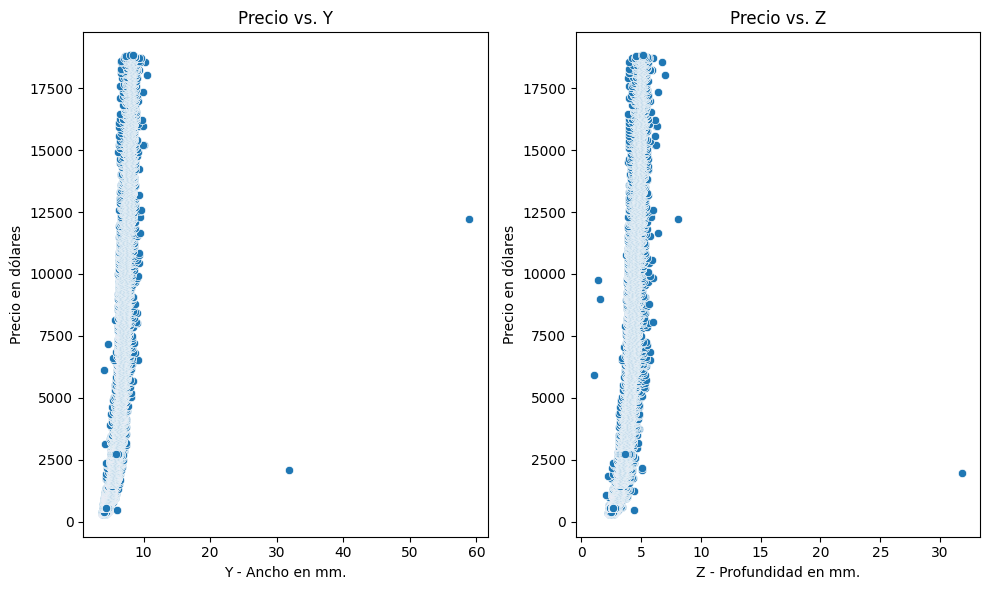

In [9]:
#Ahora vampos a explorar las medidas de las gemas para evaluar los posibles outliers que observabamos al principio en "y" y "z".
f, axs = plt.subplots(1,2, figsize=(10, 6), gridspec_kw=dict(width_ratios=[5, 5]))
sns.scatterplot(data=df, x="y", y="price", ax=axs[0])
sns.scatterplot(data=df, x="z", y="price", ax=axs[1])
axs[0].set_title('Precio vs. Y')
axs[1].set_title('Precio vs. Z')
axs[0].set_xlabel('Y - Ancho en mm.')
axs[1].set_xlabel('Z - Profundidad en mm.')
axs[0].set_ylabel('Precio en dólares')
axs[1].set_ylabel('Precio en dólares')

f.tight_layout()

#plt.title('Carat vs. Precio')    ######  Cuando es un solo gráfico ponia titulos de esta forma, si quiero hacer más de uno use axs (creo de matplotlib) porque no encontre como se hace con seaborn
#plt.xlabel('Carat (quilates)')
#plt.ylabel('Precio en dólares')

Efectivamente, observamos dos valores atípicos para el ancho y uno para la profundidad. Podemos optar por eliminar estas filas.

In [31]:
df.loc[df['y']>=20]

,carat,cut,color,clarity,depth,table,price,x,y,z
24068,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06
49190,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12


In [11]:
df.loc[df['z']>25]

,carat,cut,color,clarity,depth,table,price,x,y,z
index,,,,,,,,,,
48411,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.8


In [38]:
df=df.drop([24068,49190,48411])

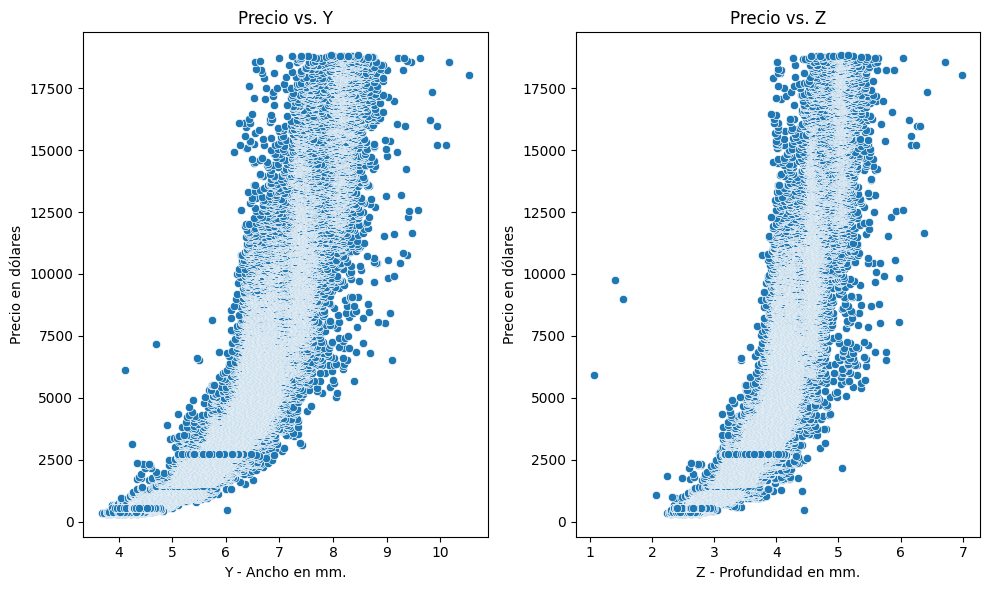

In [39]:
#Chequeamos las eliminaciones
f, axs = plt.subplots(1,2, figsize=(10, 6), gridspec_kw=dict(width_ratios=[5, 5]))
sns.scatterplot(data=df, x="y", y="price", ax=axs[0])
sns.scatterplot(data=df, x="z", y="price", ax=axs[1])
axs[0].set_title('Precio vs. Y')
axs[1].set_title('Precio vs. Z')
axs[0].set_xlabel('Y - Ancho en mm.')
axs[1].set_xlabel('Z - Profundidad en mm.')
axs[0].set_ylabel('Precio en dólares')
axs[1].set_ylabel('Precio en dólares')

f.tight_layout()